Missing Values:
 age                  0
workclass         1394
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1397
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hour_per_week        0
native_country     430
label                0
dtype: int64


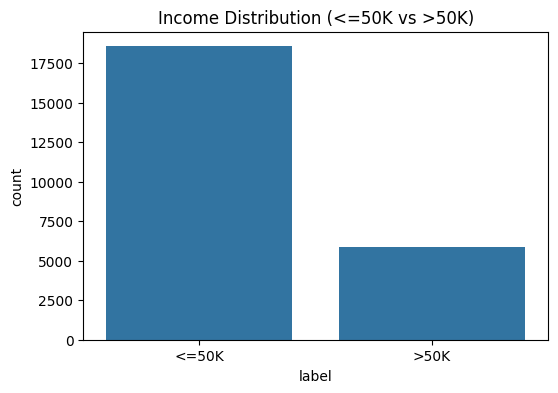

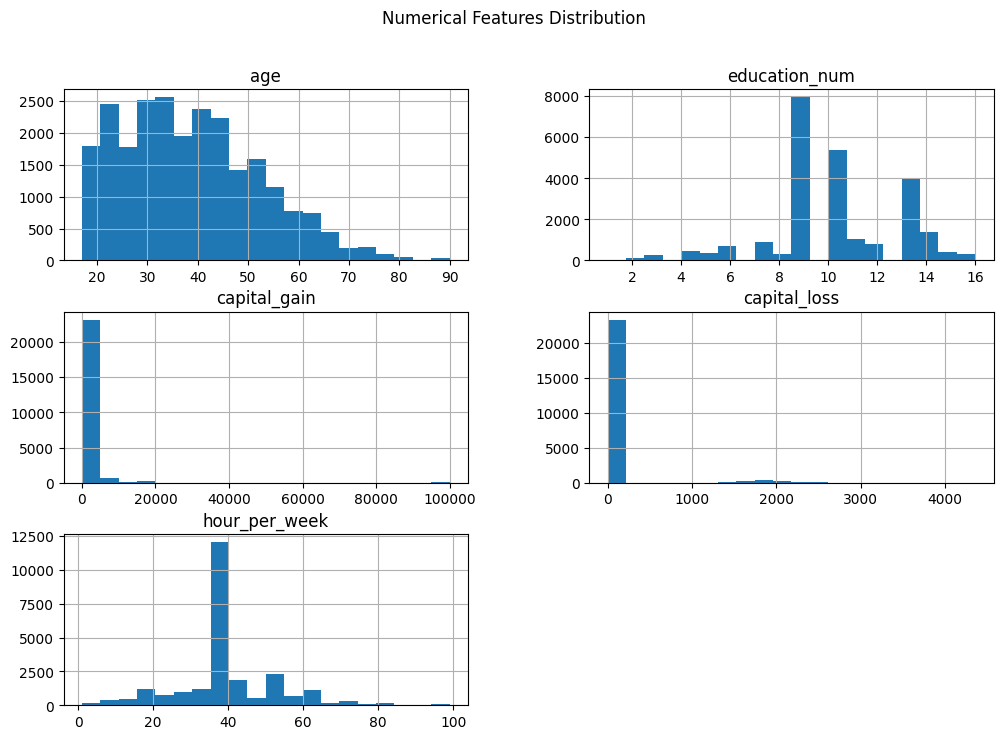

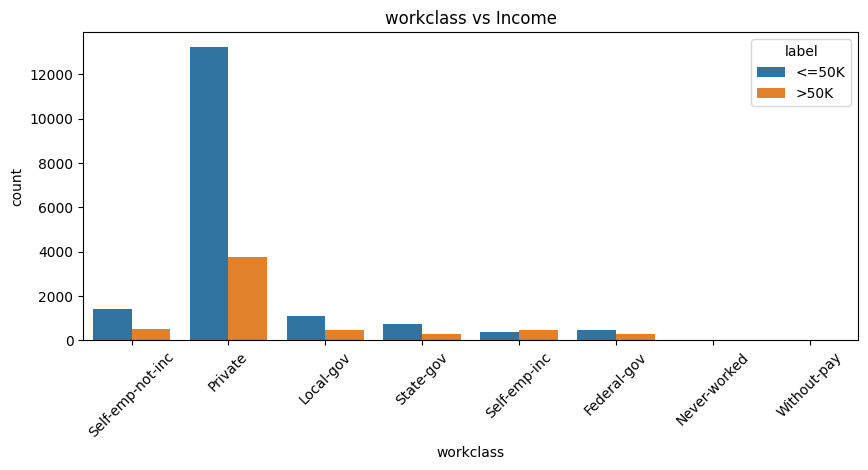

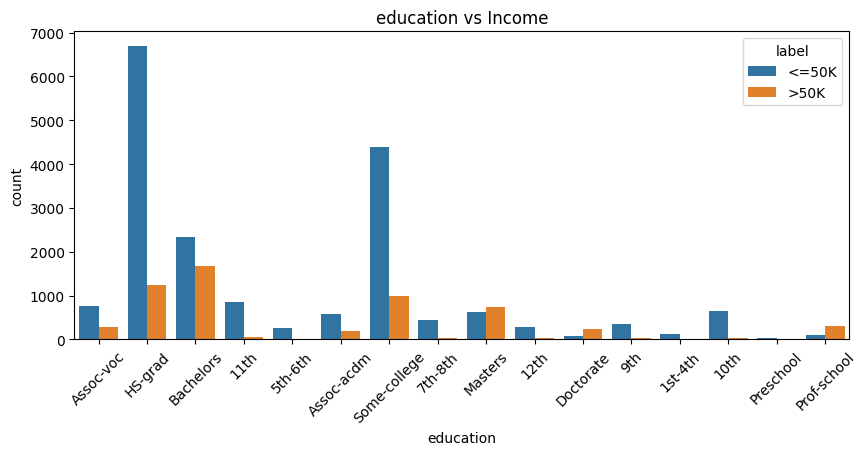

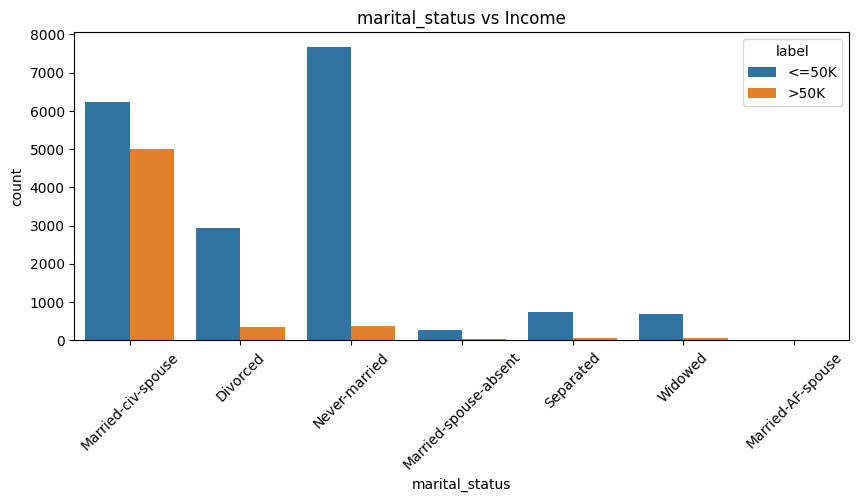

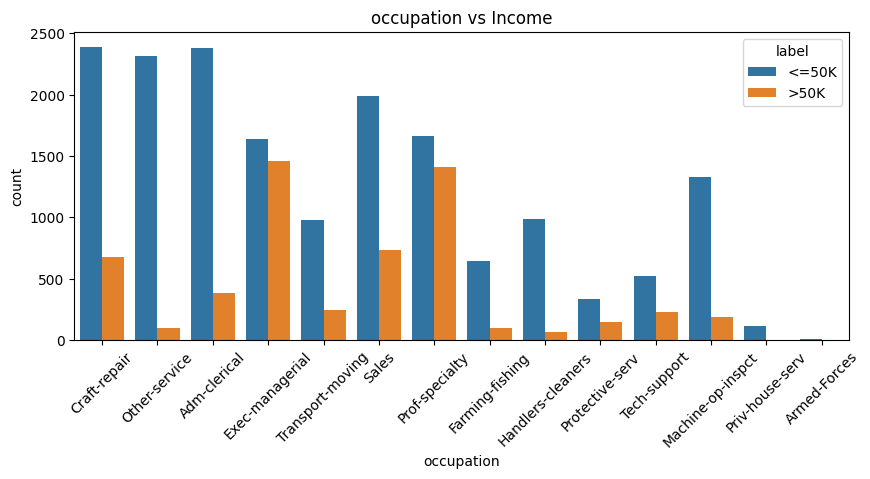

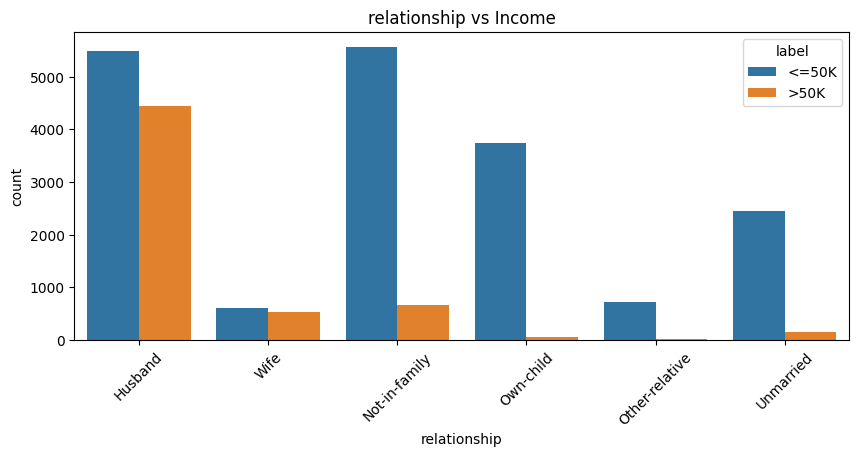

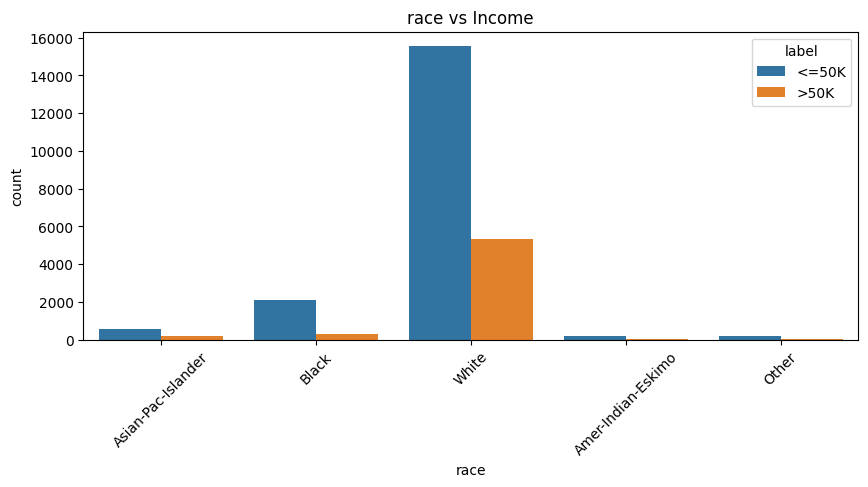

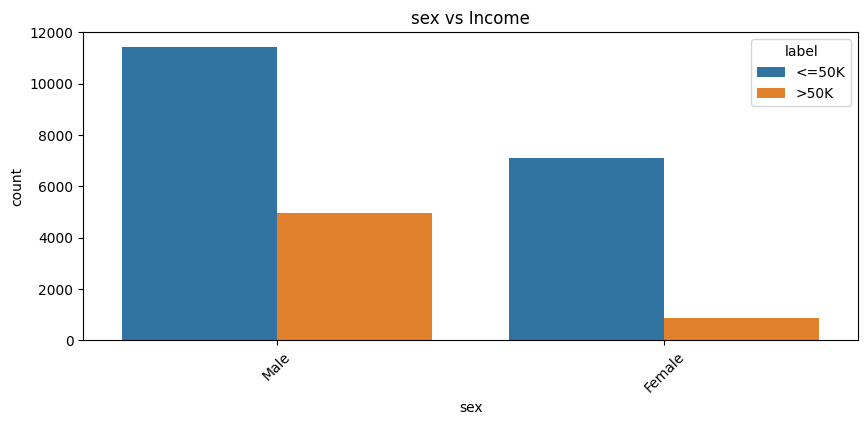

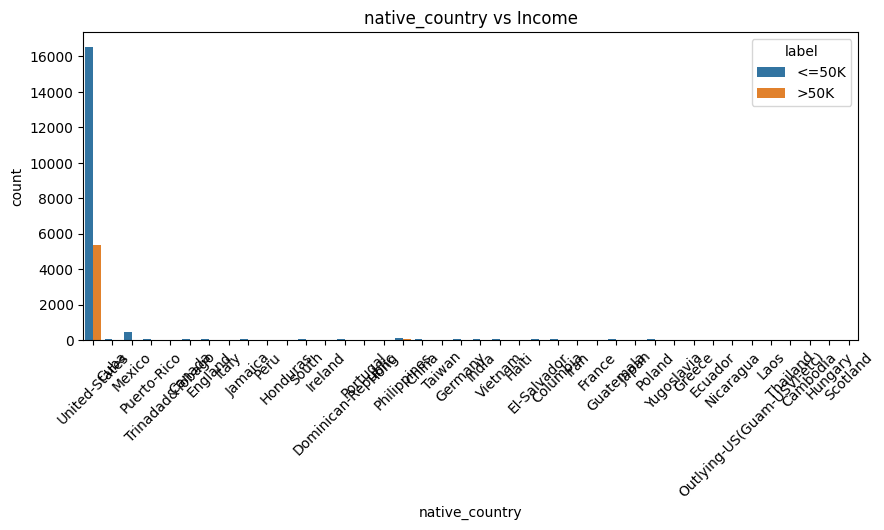


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3700
        >50K       0.71      0.61      0.66      1185

    accuracy                           0.84      4885
   macro avg       0.80      0.76      0.78      4885
weighted avg       0.84      0.84      0.84      4885


Confusion Matrix:
[[3406  294]
 [ 464  721]]

Accuracy: 0.8448311156601842


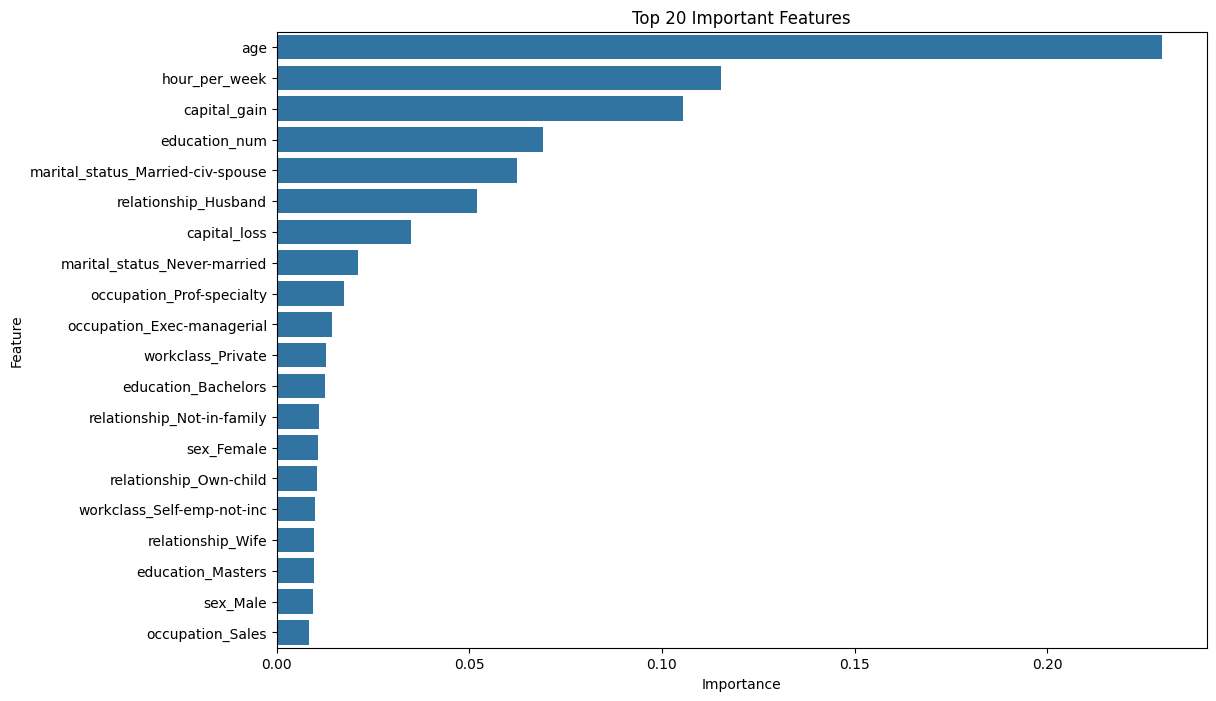

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('train.csv')

# Data Cleaning
# Remove trailing dots in labels (e.g., '<=50K.' -> '<=50K')
data['label'] = data['label'].str.rstrip('.')

# Replace '?' with NaN for missing values
data.replace('?', np.nan, inplace=True)

# Check missing values
print("Missing Values:\n", data.isnull().sum())

# Exploratory Data Analysis (EDA)
# Plot income distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Income Distribution (<=50K vs >50K)')
plt.show()

# Plot numerical features
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hour_per_week']
data[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Numerical Features Distribution')
plt.show()

# Plot categorical features
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=data, hue='label')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Income')
    plt.show()

# Preprocessing
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model Training (Random Forest)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature Importance (if using RandomForest)
feature_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = feature_encoder.get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

importances = model.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.show()